USED BIKES PREDICTION - DATA SCIENCE PROJECT 

UNID:UMID22052538152
NAME: JOLA KESEENA C

OBJECTIVE: TO PREDICT THE SELLING PRICE OF USED BIKE BASED ON FEATURES LIKE MODEL YEAR,KILOMETERS DRIVEN, MILEAGE, POWER, ENGINE CAPACITY, BRAND,OWNERSHIP HISTORY AND LOCATION.

[ADDITIONALLY I DEPLOYED THIS IN STREAMLIT]

LOAD THE DATASET AND INFORMATION ABOUT IT

In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv("bikes.csv")


In [4]:
print("Dataset Info:")
print(df.info()) 

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7857 entries, 0 to 7856
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   model_name  7857 non-null   object
 1   model_year  7857 non-null   int64 
 2   kms_driven  7857 non-null   object
 3   owner       7857 non-null   object
 4   location    7838 non-null   object
 5   mileage     7846 non-null   object
 6   power       7826 non-null   object
 7   price       7857 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 491.2+ KB
None


In [5]:
print("\n First 5 Rows:")
print(df.head())  



 First 5 Rows:
                         model_name  model_year      kms_driven        owner  \
0     Bajaj Avenger Cruise 220 2017        2017        17000 Km  first owner   
1  Royal Enfield Classic 350cc 2016        2016        50000 Km  first owner   
2               Hyosung GT250R 2012        2012        14795 Km  first owner   
3        Bajaj Dominar 400 ABS 2017        2017  Mileage 28 Kms  first owner   
4             Jawa Perak 330cc 2020        2020         2000 Km  first owner   

      location       mileage      power   price  
0    hyderabad  \n\n 35 kmpl     19 bhp   63500  
1    hyderabad  \n\n 35 kmpl  19.80 bhp  115000  
2    hyderabad  \n\n 30 kmpl     28 bhp  300000  
3  pondicherry   \n\n 28 Kms  34.50 bhp  100000  
4    bangalore         \n\n      30 bhp  197500  


In [6]:
print("\n Column Names:")
print(df.columns.tolist()) 


 Column Names:
['model_name', 'model_year', 'kms_driven', 'owner', 'location', 'mileage', 'power', 'price']


In [7]:
print("\nDataset Shape (rows, columns):")
print(df.shape)         



Dataset Shape (rows, columns):
(7857, 8)


In [8]:
print("\n Summary Statistics:")
print(df.describe(include='all'))


 Summary Statistics:
                              model_name   model_year       kms_driven  \
count                               7857  7857.000000             7857   
unique                              1724          NaN             1801   
top     Royal Enfield Classic 350cc 2017          NaN  Mileage 65 Kmpl   
freq                                  78          NaN              436   
mean                                 NaN  2015.367698              NaN   
std                                  NaN     4.001443              NaN   
min                                  NaN  1950.000000              NaN   
25%                                  NaN  2014.000000              NaN   
50%                                  NaN  2016.000000              NaN   
75%                                  NaN  2018.000000              NaN   
max                                  NaN  2021.000000              NaN   

              owner location       mileage      power         price  
count          7857

In [ ]:
IDENTIFYING MISSING VALUES AND REPLACE IT 

In [9]:
print("\n Missing Values:")
print(df.isnull().sum()) 


 Missing Values:
model_name     0
model_year     0
kms_driven     0
owner          0
location      19
mileage       11
power         31
price          0
dtype: int64


In [10]:
total_zeros = (df == 0).sum()
print(total_zeros)

model_name     0
model_year     0
kms_driven     0
owner          0
location       0
mileage        0
power          0
price         31
dtype: int64


In [11]:

cols_to_check = ['location', 'mileage', 'power', 'price']
df[cols_to_check] = df[cols_to_check].replace(0, np.nan)


In [12]:
#Before drop
df.shape

(7857, 8)

In [13]:
df.dropna(inplace=True) 

In [14]:
df.shape

(7765, 8)

In [ ]:
EXPLORATORY DATA ANALYSIS

In [15]:
# Display statistical summary of numerical features
df.describe().T



,count,mean,std,min,25%,50%,75%,max
model_year,7765.0,2015.432067,3.826772,1950.0,2014.0,2016.0,2018.0,2021.0
price,7765.0,106446.597167,136551.101545,2000.0,42855.0,75000.0,125000.0,3000000.0


UNIVARIATE ANALYSIS

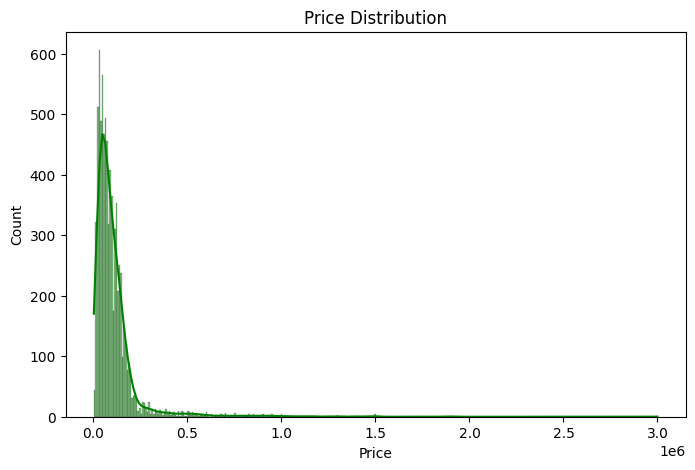

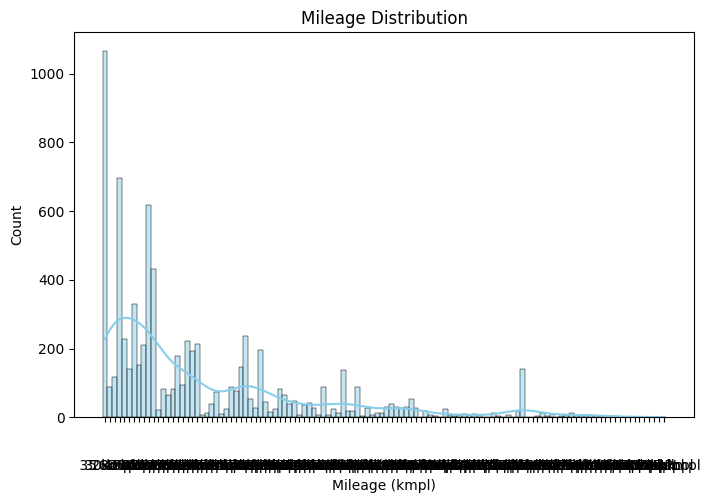

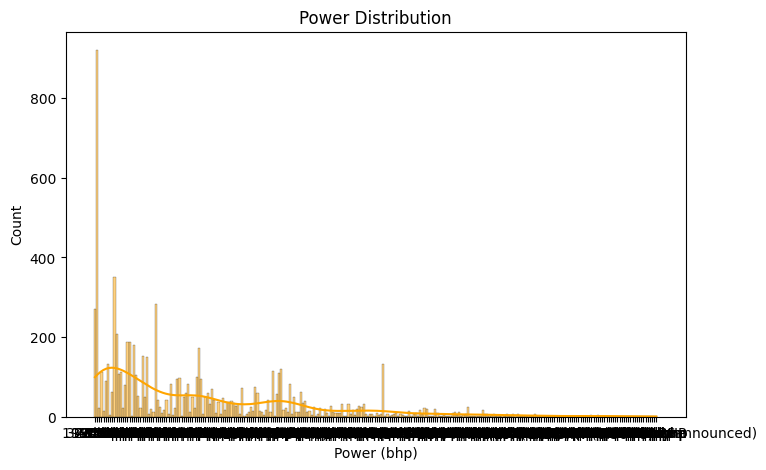

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Price distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], kde=True, color='green')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

# Mileage distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['mileage'], kde=True, color='skyblue')
plt.title('Mileage Distribution')
plt.xlabel('Mileage (kmpl)')
plt.ylabel('Count')
plt.show()

# Power distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['power'], kde=True, color='orange')
plt.title('Power Distribution')
plt.xlabel('Power (bhp)')
plt.ylabel('Count')
plt.show()



BIVARIATE ANALYSIS

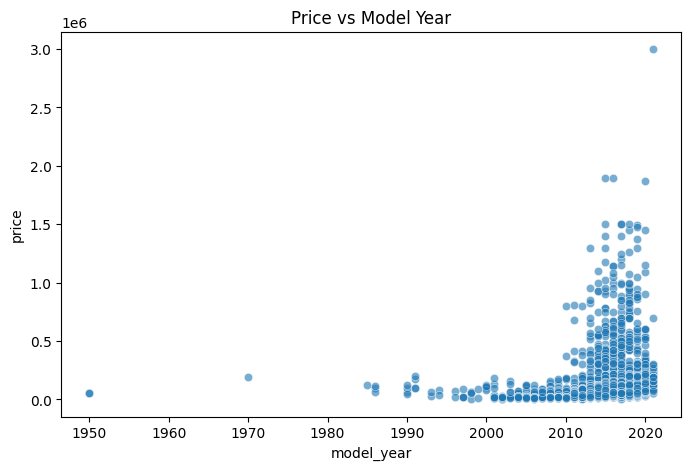

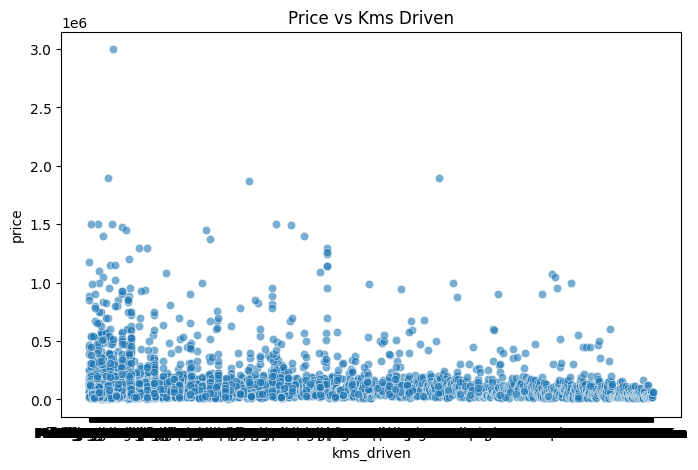

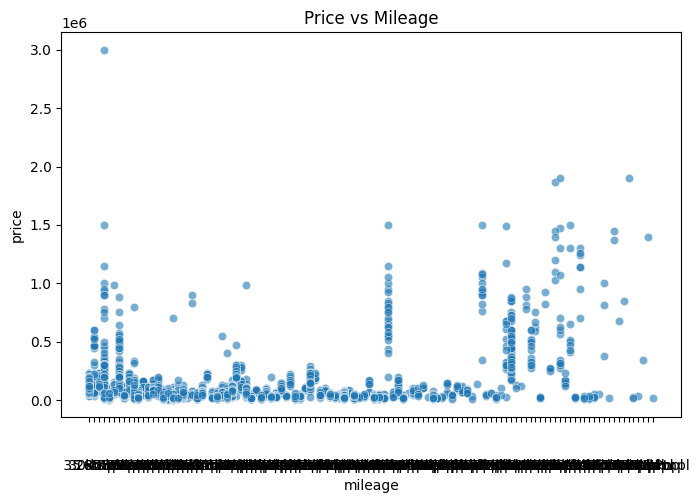

In [17]:
# Price vs Model Year
plt.figure(figsize=(8, 5))
sns.scatterplot(x='model_year', y='price', data=df, alpha=0.6)
plt.title('Price vs Model Year')
plt.show()

# Price vs Kms Driven
plt.figure(figsize=(8, 5))
sns.scatterplot(x='kms_driven', y='price', data=df, alpha=0.6)
plt.title('Price vs Kms Driven')
plt.show()

# Price vs Mileage
plt.figure(figsize=(8, 5))
sns.scatterplot(x='mileage', y='price', data=df, alpha=0.6)
plt.title('Price vs Mileage')
plt.show()


In [ ]:
MULTI VARIATE ANALYSIS

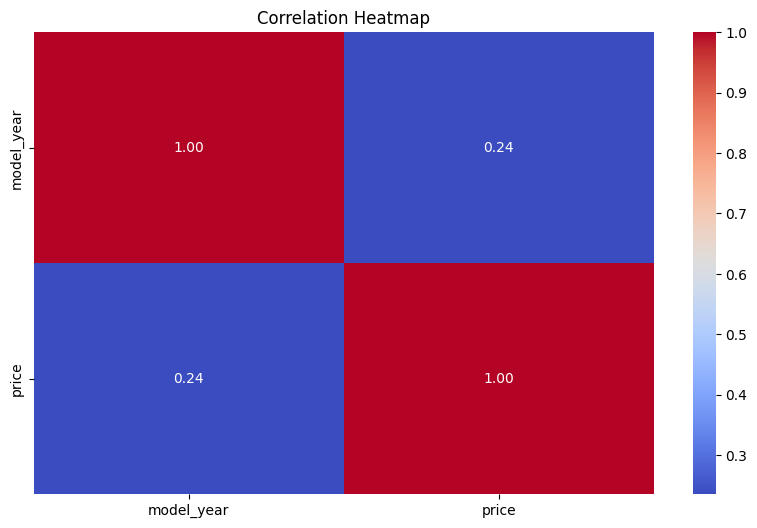

In [18]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()



COMPREHENSIVE PREPROCESSING AND FEATURE ENGINEERING PIPELINE FOR PREDICTIVE MODELING

In [19]:

import re
from datetime import datetime



In [ ]:

#   Clean 'mileage', 'power', 'kms_driven'
df['mileage'] = df['mileage'].astype(str).str.replace(r'[^0-9.]', '', regex=True)
df['mileage'] = pd.to_numeric(df['mileage'], errors='coerce')

df['power'] = df['power'].astype(str).str.replace(r'[^0-9.]', '', regex=True)
df['power'] = pd.to_numeric(df['power'], errors='coerce')

df['kms_driven'] = df['kms_driven'].astype(str).str.replace(r'[^0-9]', '', regex=True)
df['kms_driven'] = pd.to_numeric(df['kms_driven'], errors='coerce')






In [ ]:
#  Extract 'cc' from 'model_name'
def extract_cc(text):
    match = re.search(r'(\d{2,4})cc', str(text).lower())
    return int(match.group(1)) if match else np.nan

df['cc'] = df['model_name'].apply(extract_cc)
df['cc'].fillna(df['cc'].median(), inplace=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_1632\3513798734.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cc'].fillna(df['cc'].median(), inplace=True)


In [ ]:
# Calculate 'bike_age'
df['bike_age'] = datetime.now().year - df['model_year']

In [ ]:
 # Extract 'brand' using known list 
known_brands = ['Honda', 'Yamaha', 'Bajaj', 'Hero', 'KTM', 'Suzuki', 'Royal', 'TVS', 'Ducati', 'Harley', 'Mahindra', 'Kawasaki']
df['brand'] = df['model_name'].apply(lambda x: next((b for b in known_brands if b in x), 'Other'))




In [35]:
# Replace all NaNs with median
df.fillna(df.median(numeric_only=True), inplace=True)


In [ ]:
# Filter realistic price range 
df = df[df['price'].between(10000, 3000000)]

In [ ]:

#  Add new engineered features 
df['power_to_cc'] = df['power'] / df['cc']
df['mileage_to_cc'] = df['mileage'] / df['cc']
df['log_kms'] = np.log1p(df['kms_driven'])

In [ ]:
#  One-hot encode categorical variables 
df_encoded = pd.get_dummies(df, columns=['owner', 'location', 'brand'], drop_first=True)



In [42]:
# Drop very rare columns (appearing <10 times)
rare_cols = [col for col in X.columns if (X[col].sum() < 10 and 'location_' in col or 'brand_' in col)]
X = X.drop(columns=rare_cols)


In [ ]:
 #Remove outliers from price using IQR
Q1 = df_encoded['price'].quantile(0.25)
Q3 = df_encoded['price'].quantile(0.75)
IQR = Q3 - Q1
df_encoded = df_encoded[(df_encoded['price'] >= Q1 - 1.5 * IQR) &
                        (df_encoded['price'] <= Q3 + 1.5 * IQR)]

#  Log transform price
df_encoded['price_log'] = np.log1p(df_encoded['price'])

#  Define X and y
X = df_encoded.drop(['price', 'price_log'], axis=1)
y = df_encoded['price_log']




In [44]:
# Check original shape
print("Original X shape:", X.shape)

# Convert all columns to numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Fill missing values with median (don’t drop rows)
X = X.fillna(X.median(numeric_only=True))

# Keep matching y
y = y[X.index]

# Show final shape
print("Final X shape after fixing:", X.shape)



Original X shape: (6526, 556)
Final X shape after fixing: (6526, 556)


MODEL BUILDING

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor


# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost Regressor
xgb_model = XGBRegressor(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    random_state=42
)

xgb_model.fit(X_train, y_train)

# Predict on test set (log-transformed)
y_pred_log = xgb_model.predict(X_test)

# Inverse transform to get actual prices
y_pred = np.expm1(y_pred_log)
y_actual = np.expm1(y_test)

# Evaluate the model
print(" XGBoost Model Evaluation:")
print("MAE: ₹", round(mean_absolute_error(y_actual, y_pred), 2))
print("MSE:", round(mean_squared_error(y_actual, y_pred), 2))
print("R² Score:", round(r2_score(y_actual, y_pred), 4))


📊 XGBoost Model Evaluation:
MAE: ₹ 9749.83
MSE: 196789208.29
R² Score: 0.9143


In [ ]:
ACTUAL VS PREDICTED

C:\Users\Admin\AppData\Local\Temp\ipykernel_1632\1741292856.py:13: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


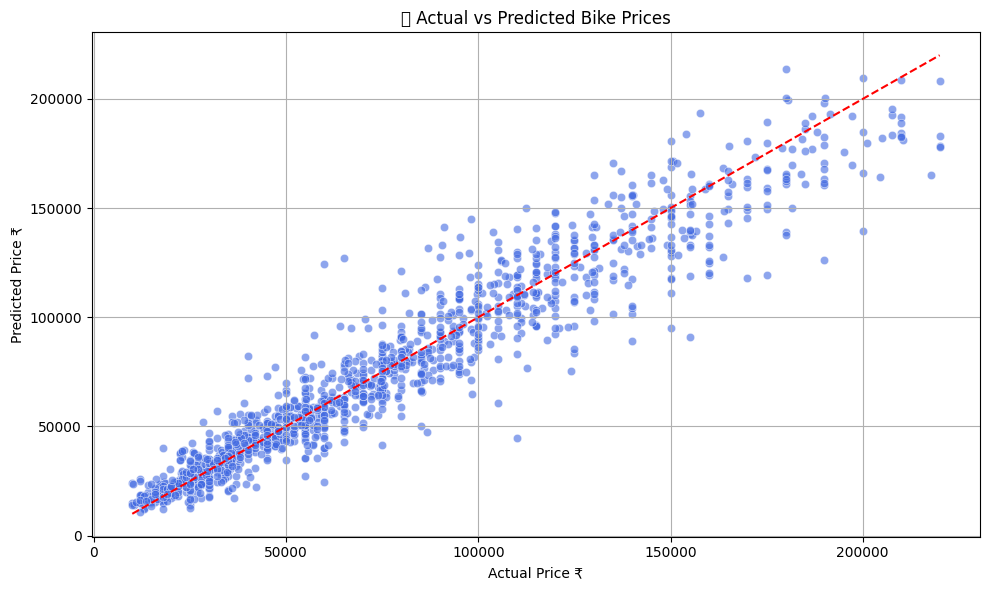

In [ ]:

# Predict on test set
y_pred = np.expm1(xgb_model.predict(X_test))     # inverse log
y_actual = np.expm1(y_test)

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_actual, y=y_pred, color='royalblue', alpha=0.6)
plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], 'r--')  # ideal line
plt.xlabel("Actual Price ₹")
plt.ylabel("Predicted Price ₹")
plt.title(" Actual vs Predicted Bike Prices")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
SAVE THE MODEL

In [47]:
import joblib

# Save the trained model
joblib.dump(xgb_model, 'xgb_model.pkl')

# Save the final list of input features
joblib.dump(X.columns.tolist(), 'model_columns.pkl')


['model_columns.pkl']

STREAMLIT APP- APP.PY   [python -m streamlit run app.py] RUN THIS IN TERMINAL FOR THE STREAMLIT LINK